# Shallow water

This is a validation of the implementation of the Shallow Water Equations (SWE) or Saint Venant eqs.
Under the assumptions of ..., they reads as:

$\partial_t h + h \nabla \cdot \mathbf{u} = 0$

$\partial_t \mathbf{u} = -g \nabla h - k \mathbf{u}$

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


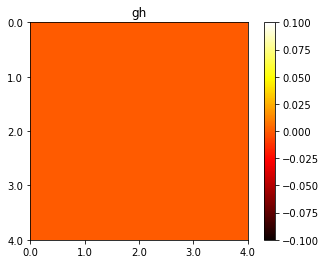

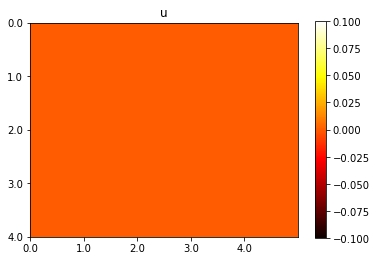

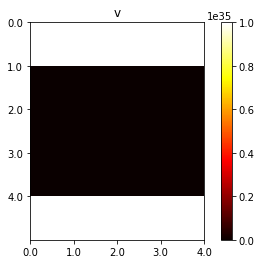

In [2]:
%reset -f
%load_ext autoreload
%autoreload 2

import Manager as Odin
from fieldAccess import *
import numpy as np

geom = Odin.createGeometry( 'rectangle', [4,4] )
mesh = Odin.createMesh( geom, res=1 )

myFlowModels = {
    'u' : Odin.TransportModelsSWE.staggeredTransport_u,
    'v' : Odin.TransportModelsSWE.staggeredTransport_v,
    'gh' : Odin.TransportModelsSWE.height
}

closure = {
    'u' : ['v','gh'],
    'v' : ['u','gh'],
    'gh' : ['u','v'],
}

Odin.initialize(flowmodels=myFlowModels, mesh=mesh, geometry=geom, closure=closure, passiveFields={} )

u=Odin.getField('u')
v=Odin.getField('v')
gh=Odin.getField('gh')

#
# u.govModel.setDiffusionCoefficient(1e-15)
# v.govModel.setDiffusionCoefficient(1e-15)
# gh.govModel.setDiffusionCoefficient(1e-10)


#u.data = 1e-6*np.random.rand(*u.data.shape)
u.data.fill(0.0)
Odin.defineBoundaryCondition(field=u, boundaryName='top', type='fixedValue', value=1)
Odin.defineBoundaryCondition(field=u, boundaryName='bottom', type='fixedValue', value=1 )
Odin.defineBoundaryCondition(field=u, boundaryName='right', type='fixedValue', value=1 )
Odin.defineBoundaryCondition(field=u, boundaryName='left', type='fixedValue', value=1)

v.data.fill(0.0)
#v.data = 1e-6*np.random.rand(*v.data.shape)
Odin.defineBoundaryCondition(field=v, boundaryName='top', type='fixedValue', value=1)
Odin.defineBoundaryCondition(field=v, boundaryName='bottom', type='fixedValue', value=1)
Odin.defineBoundaryCondition(field=v, boundaryName='left', type='fixedValue', value=1 )
Odin.defineBoundaryCondition(field=v, boundaryName='right', type='fixedValue', value=1)

gh.data.fill(0.0)
#gh.data = 1e-10*np.random.rand(*gh.data.shape)
Odin.defineBoundaryCondition(field=gh, boundaryName='top', type='fixedValue', value=1)
Odin.defineBoundaryCondition(field=gh, boundaryName='bottom', type='fixedValue', value=1)
Odin.defineBoundaryCondition(field=gh, boundaryName='left', type='fixedValue', value=1 )
Odin.defineBoundaryCondition(field=gh, boundaryName='right', type='fixedValue', value=1)

#gh.data[2,2] = 10

alphaGH = 0.2
alphaV = 0.5

for i in range(1):
#    gh.data = Odin.solve(gh)
    u.data = Odin.solve(u)
    v.data = Odin.solve(v)

Odin.display(gh,mesh, 'gh')
Odin.display(u,mesh, 'u')
Odin.display(v,mesh, 'v')


In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)